# 11 차시 - 본문 실습

## 크롬 개발자 도구 - 웹페이지 살펴보기

* http://kosis.kr  ( 국가통계포탈 )
* http://kosis.kr/conts/nsportalStats/nsportalStats_0101Body.jsp?menuId=all  (100대지표)


In [1]:
import requests
from bs4 import BeautifulSoup

url = 'http://kosis.kr/conts/nsportalStats/nsportalStats_0101Body.jsp?menuId=all'
r = requests.get(url)
r.text[:1000]

'<!DOCTYPE html>\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<html lang="ko">\r\n<head> \r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n    <title>KOSIS 100대 지표</title>\r\n    <!-- css -->\r\n    <link type="text/css" rel="stylesheet" media="all" href="/conts/ext/nsportalStats/css/indicator.css" />\r\n    <!-- script -->\r\n    <script type="text/javascript" src="/conts/ext/script/jquery.js"></script>\r\n    <script type="text/javascript">\r\n    //<![CDATA[ \r\n\t\t// visual로 리다이렉트 추가\r\n\t\tvar menuId = "all";\r\n\t\t$(document).ready(function(){\r\n\t\t\tif(menuId == \'\'){\r\n\t\t\t\tlocation.href = "https://kosis.kr/visual/nsportalStats/index.do?menuId=all";\r\n\t\t\t}else{\r\n\t\t\t\tlocation.href = "https://kosis.kr/visual/nsportalStats/index.do?menuId="+menuId;\r\n\t\t\t}\r\n\t\t\t\t\t\t\r\n\t\t});\r\n\t\t\r\n     

In [2]:
soup = BeautifulSoup(r.text)

C:\Users\plusjune\anaconda3\lib\site-packages\bs4\__init__.py:177: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 194 of the file C:\Users\plusjune\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  warnings.warn(self.NO_PARSER_SPECIFIED_WARNING % dict(


<img src="https://i.imgur.com/TeRPnDH.png" >

In [3]:
soup.title

<title>KOSIS 100대 지표</title>

In [4]:
soup.title.text

'KOSIS 100대 지표'

In [5]:
soup.find('title')

<title>KOSIS 100대 지표</title>

In [6]:
soup.find('span')

<span class="textLeft">
<img alt="" class="Y" src="/conts/ext/nsportalStats/images/indicator/m_year.png" style="padding-bottom:6px;padding-top:0px;text-align:justify;"/>
<a href="/conts/nsportalStats/nsportalStats_0102Body.jsp;jsessionid=SIdgh8FiuwjxxQQi5vP8KWg5AYtV18H8leliSnc1Tv7TKwr07LTTsbPv6Kj1RCUJ.STAT_WAS2_servlet_engine4?menuId=10&amp;NUM=1001&amp;cntUpdate=Y" style="padding-bottom:6px;padding-top:0px;position:absolute;">추계인구
				 	 ('22)	
				 	 		 	 
				  </a>
</span>

In [7]:
spans  = soup.find_all('span')
spans[:5]

[<span class="textLeft">
 <img alt="" class="Y" src="/conts/ext/nsportalStats/images/indicator/m_year.png" style="padding-bottom:6px;padding-top:0px;text-align:justify;"/>
 <a href="/conts/nsportalStats/nsportalStats_0102Body.jsp;jsessionid=SIdgh8FiuwjxxQQi5vP8KWg5AYtV18H8leliSnc1Tv7TKwr07LTTsbPv6Kj1RCUJ.STAT_WAS2_servlet_engine4?menuId=10&amp;NUM=1001&amp;cntUpdate=Y" style="padding-bottom:6px;padding-top:0px;position:absolute;">추계인구
 				 	 ('22)	
 				 	 		 	 
 				  </a>
 </span>,
 <span class="textRight">
 					  
 					  51,628,117
 					  
 				  </span>,
 <span class="textLeft">
 <img alt="" class="Y" src="/conts/ext/nsportalStats/images/indicator/m_year.png" style="padding-bottom:6px;padding-top:0px;text-align:justify;"/>
 <a href="/conts/nsportalStats/nsportalStats_0102Body.jsp;jsessionid=SIdgh8FiuwjxxQQi5vP8KWg5AYtV18H8leliSnc1Tv7TKwr07LTTsbPv6Kj1RCUJ.STAT_WAS2_servlet_engine4?menuId=10&amp;NUM=1007&amp;cntUpdate=Y" style="padding-bottom:6px;padding-top:0px;position:absolute

In [8]:
right_list = soup.find_all('span', attrs={'class': 'textRight'})
right_list[0]

<span class="textRight">
					  
					  51,628,117
					  
				  </span>

In [9]:
v = right_list[0]
v

<span class="textRight">
					  
					  51,628,117
					  
				  </span>

In [10]:
v.text

'\r\n\t\t\t\t\t  \r\n\t\t\t\t\t  51,628,117\r\n\t\t\t\t\t  \r\n\t\t\t\t  '

In [11]:
v.text.strip()

'51,628,117'

In [12]:
v.text.strip().replace(',', '')

'51628117'

In [13]:
v = float(v.text.strip().replace(',', ''))
v

51628117.0

In [14]:
left_list = soup.find_all('span', attrs={'class': 'textLeft'})
k = left_list[0].text
k

"\n\n추계인구\r\n\t\t\t\t \t ('22)\t\r\n\t\t\t\t \t \t\t \t \r\n\t\t\t\t  \n"

In [15]:
k = k.replace('\n', '').replace('\t', '').replace('\r', '').replace(' ', '')
k

"추계인구('22)"

In [16]:
print(k, v)

추계인구('22) 51628117.0


## 도전 과제

In [17]:
import requests
from bs4 import BeautifulSoup

url = 'http://kosis.kr/conts/nsportalStats/nsportalStats_0101Body.jsp?menuId=all'
r = requests.get(url)
soup = BeautifulSoup(r.text)

left_list = soup.find_all('span', attrs={'class': 'textLeft'})
right_list = soup.find_all('span', attrs={'class': 'textRight'})

for left, right in zip(left_list, right_list):
    left = left.text.replace('\n', '').replace('\t', '').replace('\r', '').replace(' ', '')
    right = float(right.text.strip().replace(',', ''))
    print(left, right)

추계인구('22) 51628117.0
총인구수(인구주택총조사기준)('20) 51829136.0
주민등록인구('21) 51638809.0
고령인구비율(65세이상)('22) 17.5
총부양비('22) 40.8
노령화지수('22) 152.0
독거노인비율('20) 7.9
인구성장률('22) -0.23
중위연령('22) 45.0
가구수('20) 21484785.0
1인가구수('20) 6643354.0
다문화가구수('20) 367775.0
합계출산율('21) 0.81
출생아수('21) 260500.0
출생성비('21) 105.2
사망률('20) 593.9
사망자수('21) 317800.0
혼인건수('21) 192507.0
이혼건수('21) 101673.0
외국인등록인구('20) 1145540.0
국내인구이동자수('21) 7213422.0
내국인국제순이동('20) 241282.0
외국인국제순이동('20) -128469.0
국제결혼건수('21) 13102.0
종교인구('15) 21553674.0
인구밀도('20) 516.2
학령인구('22) 7482.0
1인당(13세이상)평균독서권수('21) 7.0
범죄발생건수('20) 1587866.0
아동학대건수('20) 30905.0
산업재해사망자수('20) 2062.0
교통사고사망자수('20) 3081.0
지진발생빈도('21) 70.0
실업률('22.04) 3.0
청년층(15~29세)실업률('22.04) 7.4
실업자수('22.04) 864.0
고용률('22.04) 62.1
취업자수('22.04) 28078.0
경제활동참가율('22.04) 64.0
경제활동인구('22.04) 28942.0
맞벌이가구비율('20) 45.4
비정규직근로자비율('21.08) 38.4
임금근로자월평균임금('21.08) 273.4
총근로시간('21) 164.2
균등화평균소득(처분가능소득기준)('20) 3450.0
균등화중위소득(처분가능소득기준)('20) 2998.0
상대적빈곤율(처분가능소득기준)('20) 15.3
지니계수(처분가능소득기준)('20) 0.331


## 2단계 - 추계 인구표 크롤링

pandas.read_html() 활용

<img src="https://i.imgur.com/MJPagpw.png" >

<img src="https://i.imgur.com/C0w4bCG.png" >

In [18]:
import pandas as pd

url = 'http://kosis.kr/conts/nsportalStats/nsportalStats_ChartBody.jsp?num=1001&grp_view_at=01'

df_list = pd.read_html(url, encoding='utf-8')
df_list[0]

,지표,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,추계인구 (명),50428893.0,50746659.0,51014947.0,51217803.0,51361911.0,51585058.0,51764822.0,51836239.0,51744876.0,51628117.0
2,추계인구(남) (명),25285319.0,25445077.0,25585894.0,25670949.0,25736793.0,25857689.0,25948706.0,25925697.0,25857805.0,25790370.0
3,추계인구(여) (명),25143574.0,25301582.0,25429053.0,25546854.0,25625118.0,25727369.0,25816116.0,25910542.0,25887071.0,25837747.0


In [19]:
df = df_list[0]
df = df.set_index('지표')
df = df.dropna()
df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
지표,,,,,,,,,,
추계인구 (명),50428893.0,50746659.0,51014947.0,51217803.0,51361911.0,51585058.0,51764822.0,51836239.0,51744876.0,51628117.0
추계인구(남) (명),25285319.0,25445077.0,25585894.0,25670949.0,25736793.0,25857689.0,25948706.0,25925697.0,25857805.0,25790370.0
추계인구(여) (명),25143574.0,25301582.0,25429053.0,25546854.0,25625118.0,25727369.0,25816116.0,25910542.0,25887071.0,25837747.0


In [20]:
df = df.T
df

지표,추계인구 (명),추계인구(남) (명),추계인구(여) (명)
2013,50428893.0,25285319.0,25143574.0
2014,50746659.0,25445077.0,25301582.0
2015,51014947.0,25585894.0,25429053.0
2016,51217803.0,25670949.0,25546854.0
2017,51361911.0,25736793.0,25625118.0
2018,51585058.0,25857689.0,25727369.0
2019,51764822.0,25948706.0,25816116.0
2020,51836239.0,25925697.0,25910542.0
2021,51744876.0,25857805.0,25887071.0
2022,51628117.0,25790370.0,25837747.0


In [21]:
%matplotlib inline

# matplotlib 설정
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams["font.family"] = 'Gulim'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

<AxesSubplot:>

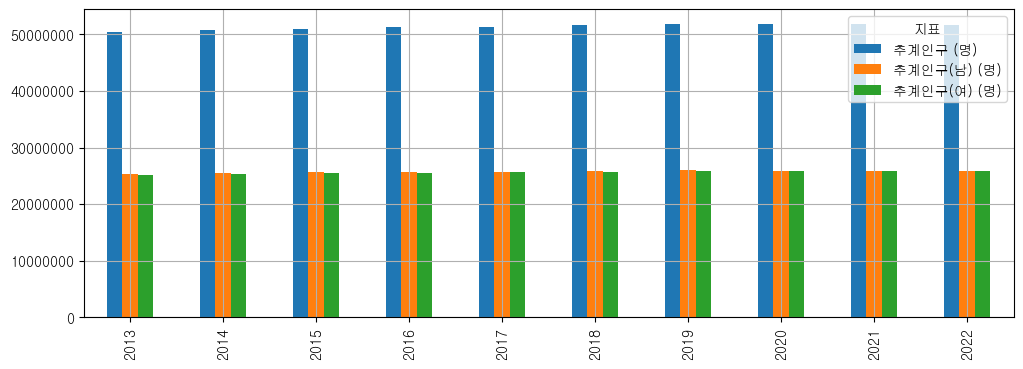

In [22]:
df.plot(kind='bar')